In [175]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
parameters: Injection dates (list of datetime)
            Withdrawal dates (list of datetime)
            The prices at which the commodity can be purchased/sold on those dates (df: columns = ['Dates', 'Prices'])
            The rate at which the gas can be injected/withdrawn (double)
            The maximum volume that can be stored (double)
            Storage costs (double)
'''

def price_gas_contract(injection_dates, withdrawal_dates, prices, injection_rate, withdrawal_rate, max_volume, storage_cost):
    current_volume = 0

    prices['Dates'] = pd.to_datetime(prices['Dates'], format = '%m/%d/%y')
    prices['Dates'] = [d.strftime('%Y-%m-%d') for d in prices['Dates']]
    num_of_dates = len(prices)
    injection = [1 if prices.iloc[i, 0] in injection_dates else 0 for i in range(num_of_dates)]
    withdrawal = [1 if prices.iloc[i, 0] in withdrawal_dates else 0 for i in range(num_of_dates)]
    prices['injection'] = injection
    prices['withdrawal'] = withdrawal
    prices.set_index('Dates', inplace=True)
    for date in prices.index:
        if prices.loc[date, 'injection'] * injection_rate + current_volume > max_volume:
            prices.loc[date, 'injection'] = 0
        current_volume += prices.loc[date, 'injection'] * injection_rate
        if prices.loc[date, 'withdrawal'] * withdrawal_rate > current_volume:
            prices.loc[date, 'withdrawal'] = 0
        current_volume -= prices.loc[date, 'withdrawal'] * withdrawal_rate

    prices['storage'] = (injection_rate * prices['injection'] - withdrawal_rate * prices['withdrawal']).cumsum()
    total_storage_cost = (prices['storage'] * storage_cost).sum()

    prices['trading_profit'] = prices['withdrawal'] * withdrawal_rate * prices['Prices'] - prices['injection'] * injection_rate * prices['Prices']
    trading_profit = prices['trading_profit'].sum()

    prices['total_profit'] = prices['trading_profit'] - prices['storage']
    total_profit = trading_profit - total_storage_cost
    print(f"Total Profit from Trading is {trading_profit};\nTotal Cost from Storage is {total_storage_cost};\nTotal Profit is {total_profit}")

    plt.figure(figsize = (15, 5))
    plt.plot(prices['total_profit'])
    plt.xticks(rotation=45)
    plt.show()
    
    return total_profit

Total Profit from Trading is 110.0;
Total Cost from Storage is 36500;
Total Profit is -36390.0


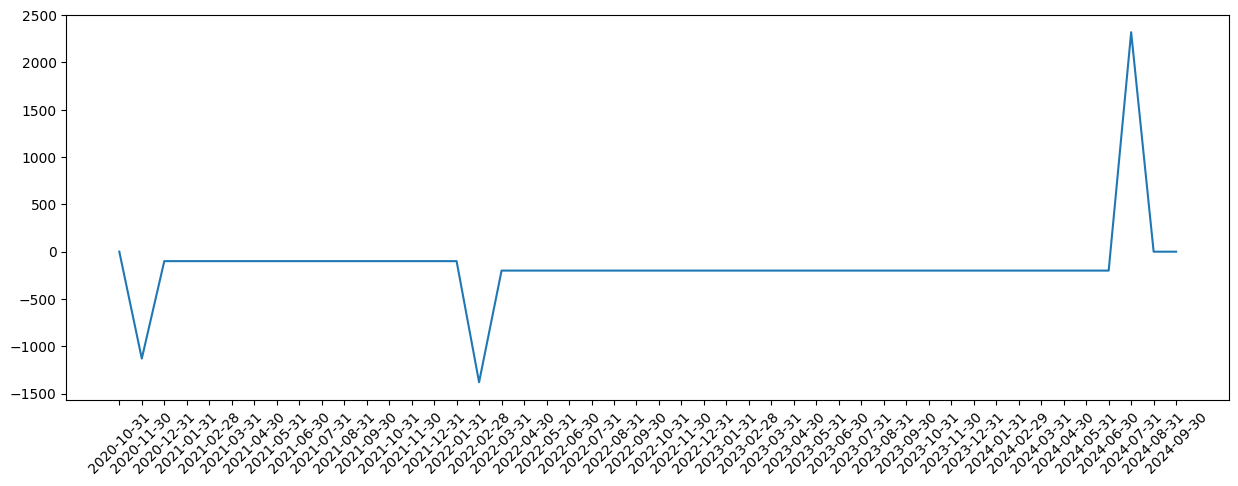

-36390.0


In [177]:
# Test the function with sample inputs
injection_dates = [datetime(2020, 11, 30), datetime(2022, 2, 28)]
withdrawal_dates = [datetime(2021, 6, 30), datetime(2024, 7, 31)]
injection_dates = [date.strftime('%Y-%m-%d') for date in injection_dates]
withdrawal_dates = [date.strftime('%Y-%m-%d') for date in withdrawal_dates]

prices = pd.read_csv("Nat_Gas.csv")
injection_rate = 100  
withdrawal_rate = 200 
max_volume = 500  
storage_cost_per_month = 5  

contract_value = price_gas_contract(injection_dates, withdrawal_dates, prices, injection_rate, withdrawal_rate, max_volume, storage_cost_per_month)